<a href="https://colab.research.google.com/github/A-hash-pixel/Cotton-disease-Prediction-deep-learning/blob/main/cotton_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
!pip install -q keras


In [78]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [79]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [80]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/cotton disease/data/data/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/cotton disease/data/data/test'

In [81]:
len(train_path)

69

In [82]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [83]:
for layer in inception.layers:
    layer.trainable = False

In [84]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/cotton disease/data/data/train/*')

In [85]:
len(folders)

4

In [86]:
x = Flatten()(inception.output)


In [87]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [88]:
len(folders)

4

In [89]:
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [90]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [92]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/cotton disease/data/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1960 images belonging to 4 classes.


In [93]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/cotton disease/data/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [94]:
r = model.fit_generator(training_set,validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
62/62 [==============================] - 42s 620ms/step - loss: 4.5153 - accuracy: 0.5898 - val_loss: 0.2799 - val_accuracy: 0.8889
Epoch 2/20
62/62 [==============================] - 35s 563ms/step - loss: 0.6359 - accuracy: 0.8873 - val_loss: 0.6358 - val_accuracy: 0.7778
Epoch 3/20
62/62 [==============================] - 35s 557ms/step - loss: 0.5391 - accuracy: 0.9050 - val_loss: 1.0571 - val_accuracy: 0.7778
Epoch 4/20
62/62 [==============================] - 35s 559ms/step - loss: 0.7553 - accuracy: 0.8942 - val_loss: 0.4145 - val_accuracy: 0.8889
Epoch 5/20
62/62 [==============================] - 35s 558ms/step - loss: 0.6668 - accuracy: 0.9161 - val_loss: 0.2182 - val_accuracy: 0.9444
Epoch 6/20
62/62 [==============================] - 35s 557ms/step - loss: 0.4750 - accuracy: 0.9303 - val_loss: 0.9492 - val_accuracy: 0.7222
Epoch 7/20
62/62 [==============================] - 35s 560ms/step - loss: 0.4151 - accuracy: 0.9383 - val_loss: 0.0012 - val_accuracy: 1.0000

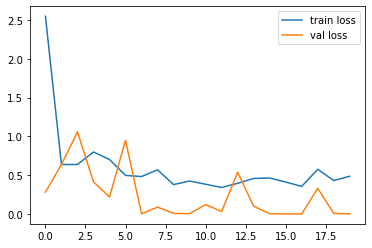

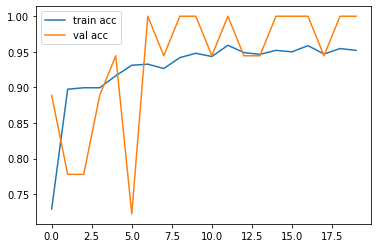

<Figure size 432x288 with 0 Axes>

In [95]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [96]:
model.save('model_inception.h5')
